#Zyanya Salinas A01625219 




# K-means clustering 


The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [10]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/A01625219/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [30]:
# Dataset url
url = Ruta + "/datasets/clustering.csv"

# Load the dataset
df = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [31]:
# Print the dataframe
df



,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [33]:
# get the number of observations and variables

df.shape



(1024, 6)

2. Drop rows with any missing values


In [37]:
# Drop rows with NaN values if existing

df.isnull().sum()

# Print the new shape


x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

3. Scatterplot




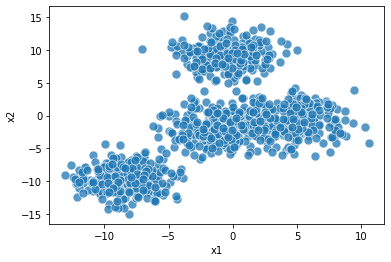

In [41]:
# Scatterplot of x1 and x2

sns.scatterplot(data=df, x = "x1", y = "x2", s = 80, alpha=0.75)
plt.show()


In [ ]:
# Scatterplot of x1 and x3




Difficult to plot independetly all combinations, let's use pairplot

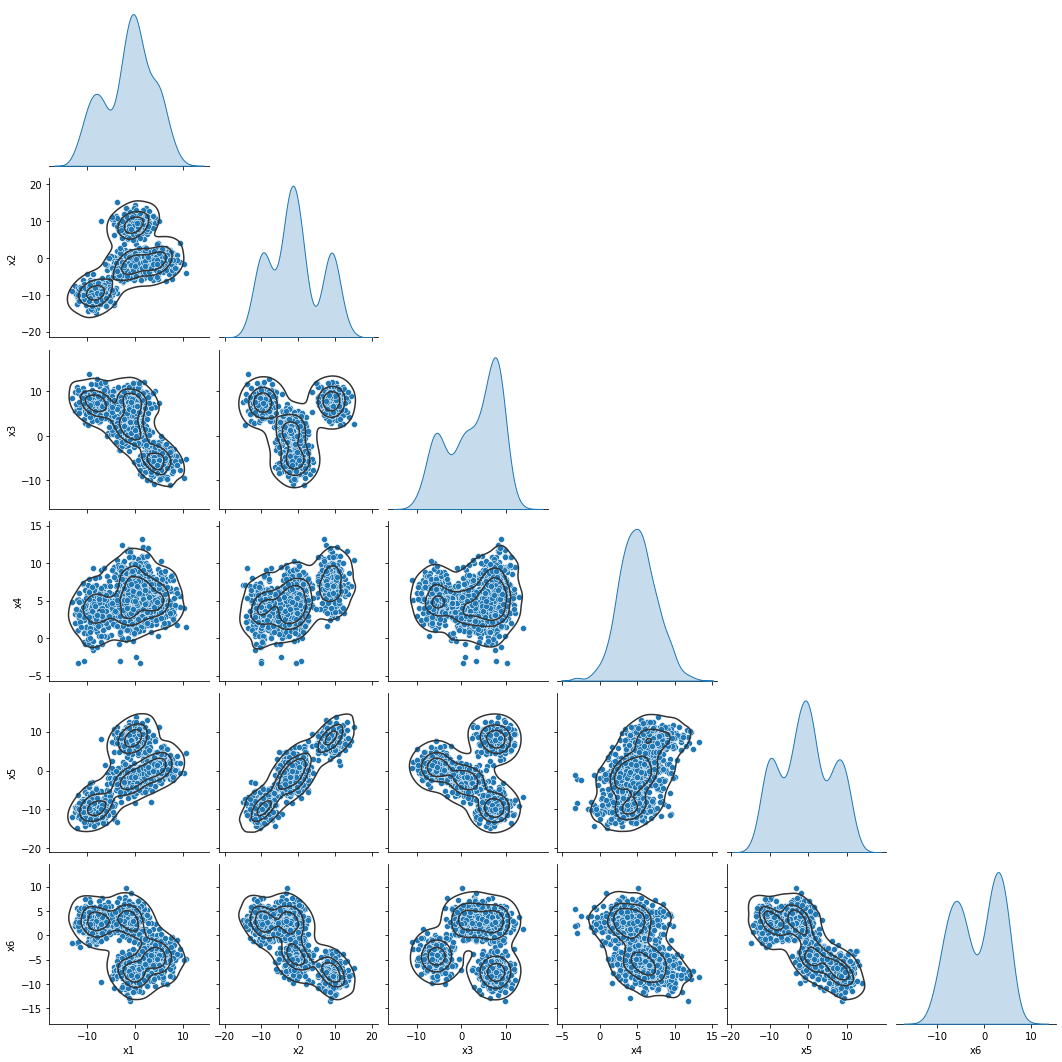

In [42]:
# Pairplot: Scatterplot of all variables

g = sns.pairplot(df,corner=True, diag_kind = "kde")
g.map_lower(sns.kdeplot, levels=4, color="0.2")
plt.show()


It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [91]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  3 # Let's assume there are 2,3,4,5...? clusters/groups
km = KMeans(n_clusters=K, n_init="auto")


# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)


# Print estimated cluster of each point in the dataset

yestimated


array([2, 0, 0, ..., 0, 2, 2], dtype=int32)

In [70]:
# Add a new column to the dataset with the cluster information

df["yestimated"] = yestimated

df


,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,3
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,2
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,2
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,2
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,1
...,...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649,1
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336,0
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100,2
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975,1


In [71]:
# Laber of the estimated clusters

df.yestimated.unique()


array([3, 2, 1, 0], dtype=int32)

In [72]:
# Cluster centroides
km.cluster_centers_


array([[-8.40571071, -9.65151928,  7.45044683,  3.77380481, -9.50855366,
         2.66099801,  4.78125   ],
       [ 4.75634768, -0.75290959, -5.5798822 ,  5.20729319,  1.024779  ,
        -4.30453201,  3.55294118],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ,  3.4609375 ],
       [-1.11162986, -1.97482508,  1.3833106 ,  3.93069765, -2.6359108 ,
         3.22632658,  1.77431907]])

In [73]:
# Sum of squared error (sse) of the final model

km.inertia_


28621.06408619215

In [74]:
# The number of iterations required to converge

km.n_iter_


3

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

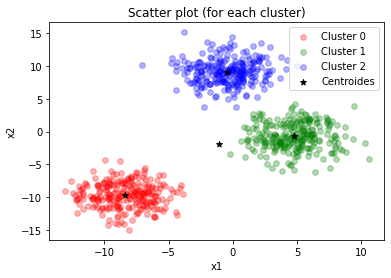

In [85]:
# Get a dataframe with the data of each clsuter

df1= df[df.yestimated==0]
df2= df[df.yestimated==1]
df3= df[df.yestimated==2]


# Scatter plot of each cluster

plt.scatter(df1.x1, df1.x2, label = "Cluster 0", c="r", marker = "o", s =32, alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = "Cluster 1", c="g", marker = "o", s =32, alpha = 0.3)
plt.scatter(df3.x1, df3.x2, label = "Cluster 2", c="b", marker = "o", s =32, alpha = 0.3)


# Plot centroids

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "black", marker ='*', label = "Centroides")
plt. title("Scatter plot (for each cluster)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [88]:
# Intialize a list to hold sum of squared error (sse)

sse = []


# Define values of k

K_rng = range (1,10)

# For each k

for k in K_rng:
  #Create Model 
  km = KMeans(n_clusters=k, n_init="auto")
  #D K-means clustering 
  km.fit_predict(df[["x1", "x2"]])
  # Save sse for each k
  sse.append(km.inertia_)




Text(0, 0.5, 'Sum of squared error')

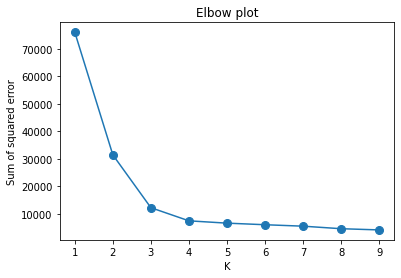

In [90]:
# Plot sse versus k

plt.plot(K_rng,sse,"o-", markersize=8)
plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("Sum of squared error")


Choose the k after which the sse is minimally reduced

La K debería de ser 4 ya que viene después de un cambio brusco para empezar a tener un cambio más ligero. 

<span style='color:Blue'> **Important remarks**  </span>

- Observations?

La suma de errores al cuadrado nos ayuda a entender cuántos centroides deberíamos tener 

En la gráfica se nota claramente como los datos se dividen o agrupan en 3 clusters. Sin embargo en la suma de errores al cuadrado podemos observar que sugiere 4 clusters para este ejercicio. 

Yo considero que el el cuarto cluster no debería considerarse ya que siento que sería un cluster que involucre a todos los datos. 


# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

HOMEWORK: KmeansCartwheel

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

In [4]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/A01625219/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [5]:
# Dataset url
url = Ruta + "/datasets/iris/iris.csv"



# Load the dataset
df = pd.read_csv(url)
df = pd.read_csv(url,names=['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth','FlowerType'])

In [6]:
# Print the dataframe
df.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,FlowerType
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
FlowerType     0
dtype: int64

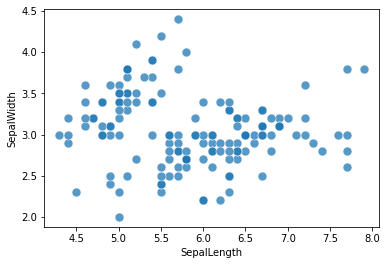

In [9]:
# Scatterplot of x1 and x2

sns.scatterplot(data=df, x = "SepalLength", y = "SepalWidth", s = 80, alpha=0.75)
plt.show()

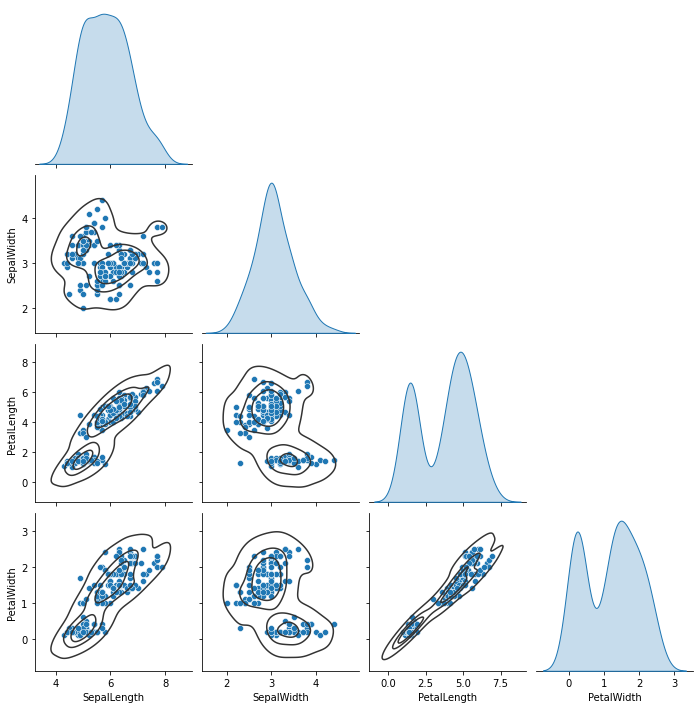

In [10]:
# Pairplot: Scatterplot of all variables

g = sns.pairplot(df,corner=True, diag_kind = "kde")
g.map_lower(sns.kdeplot, levels=4, color="0.2")
plt.show()


In [24]:
dfN = df.drop(["FlowerType"], axis = 1)

dfN

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  3 # Let's assume there are 2,3,4,5...? clusters/groups
km = KMeans(n_clusters=K, n_init="auto")


# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(dfN)


# Print estimated cluster of each point in the dataset

yestimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [45]:
# Add a new column to the dataset with the cluster information

dfN["yestimated"] = yestimated

dfN

,SepalLength,SepalWidth,PetalLength,PetalWidth,yestimated
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
# Laber of the estimated clusters

dfN.yestimated.unique()


array([1, 2, 0], dtype=int32)

In [47]:
# Cluster centroides
km.cluster_centers_

array([[5.88360656e+00, 2.74098361e+00, 4.38852459e+00, 1.43442623e+00,
        2.39344262e+00],
       [5.00600000e+00, 3.42800000e+00, 1.46200000e+00, 2.46000000e-01,
        1.00000000e+00],
       [6.85384615e+00, 3.07692308e+00, 5.71538462e+00, 2.05384615e+00,
        1.33226763e-15]])

In [48]:
# Sum of squared error (sse) of the final model

km.inertia_


93.41304287515766

In [49]:
# The number of iterations required to converge

km.n_iter_

2

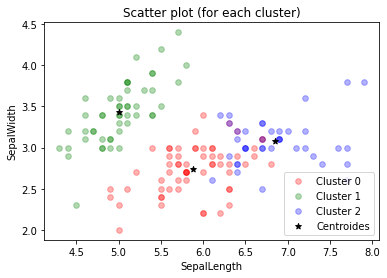

In [50]:
# Get a dataframe with the data of each clsuter

df1= dfN[dfN.yestimated==0]
df2= dfN[dfN.yestimated==1]
df3= dfN[dfN.yestimated==2]


# Scatter plot of each cluster

plt.scatter(df1.SepalLength, df1.SepalWidth, label = "Cluster 0", c="r", marker = "o", s =32, alpha = 0.3)
plt.scatter(df2.SepalLength, df2.SepalWidth, label = "Cluster 1", c="g", marker = "o", s =32, alpha = 0.3)
plt.scatter(df3.SepalLength, df3.SepalWidth, label = "Cluster 2", c="b", marker = "o", s =32, alpha = 0.3)


# Plot centroids

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "black", marker ='*', label = "Centroides")
plt. title("Scatter plot (for each cluster)")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend()
plt.show()

In [51]:
# Intialize a list to hold sum of squared error (sse)

sse = []


# Define values of k

K_rng = range (1,10)

# For each k

for k in K_rng:
  #Create Model 
  km = KMeans(n_clusters=k, n_init="auto")
  #D K-means clustering 
  km.fit_predict(df[["SepalLength", "SepalWidth"]])
  # Save sse for each k
  sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

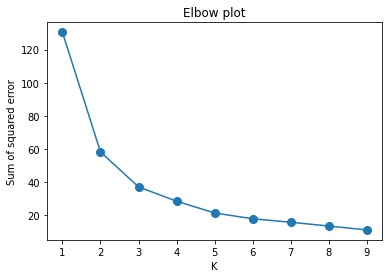

In [52]:
# Plot sse versus k

plt.plot(K_rng,sse,"o-", markersize=8)
plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("Sum of squared error")


# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics
